In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
data = pd.read_csv('Proshlye_dannye_-_XAU_USD_1.csv')

In [36]:
data.head()

,Дата,Цена,Откр.,Макс.,Мин.,Изм. %
0,18.03.2009,"941,90","916,50","947,05","884,90","2,94%"
1,17.03.2009,"915,00","924,10","924,70","912,20","-0,90%"
2,16.03.2009,"923,35","928,35","930,25","915,50","-0,52%"
3,13.03.2009,"928,20","927,05","939,50","919,80","0,06%"
4,12.03.2009,"927,65","906,95","931,45","905,95","2,20%"


In [37]:
data.rename( columns = {'Дата': 'date', 
             'Цена': 'price', 
             'Откр.': 'open_price', 
             'Макс.': 'max_price', 
             'Мин.': 'min_price', 
             'Изм. %': 'change'}, inplace = True)

In [38]:
data.dtypes

date          object
price         object
open_price    object
max_price     object
min_price     object
change        object
dtype: object

In [39]:
data.head()

,date,price,open_price,max_price,min_price,change
0,18.03.2009,"941,90","916,50","947,05","884,90","2,94%"
1,17.03.2009,"915,00","924,10","924,70","912,20","-0,90%"
2,16.03.2009,"923,35","928,35","930,25","915,50","-0,52%"
3,13.03.2009,"928,20","927,05","939,50","919,80","0,06%"
4,12.03.2009,"927,65","906,95","931,45","905,95","2,20%"


In [40]:
int_cols = ['price', 'open_price', 'max_price', 'min_price', 'change']

for i in int_cols:
    data.loc[:, i] = data.loc[: , i].apply(lambda x: (x.replace('.', '')).replace(',', '.'))

In [41]:
data ['change'] = data.change.apply(lambda x: x.replace('%', ''))

In [42]:
data.head()

,date,price,open_price,max_price,min_price,change
0,18.03.2009,941.90,916.50,947.05,884.90,2.94
1,17.03.2009,915.00,924.10,924.70,912.20,-0.90
2,16.03.2009,923.35,928.35,930.25,915.50,-0.52
3,13.03.2009,928.20,927.05,939.50,919.80,0.06
4,12.03.2009,927.65,906.95,931.45,905.95,2.20


In [43]:
data [int_cols] = data[int_cols].astype('float')

In [44]:
data.dtypes

date           object
price         float64
open_price    float64
max_price     float64
min_price     float64
change        float64
dtype: object

In [45]:
import matplotlib.ticker as ticker

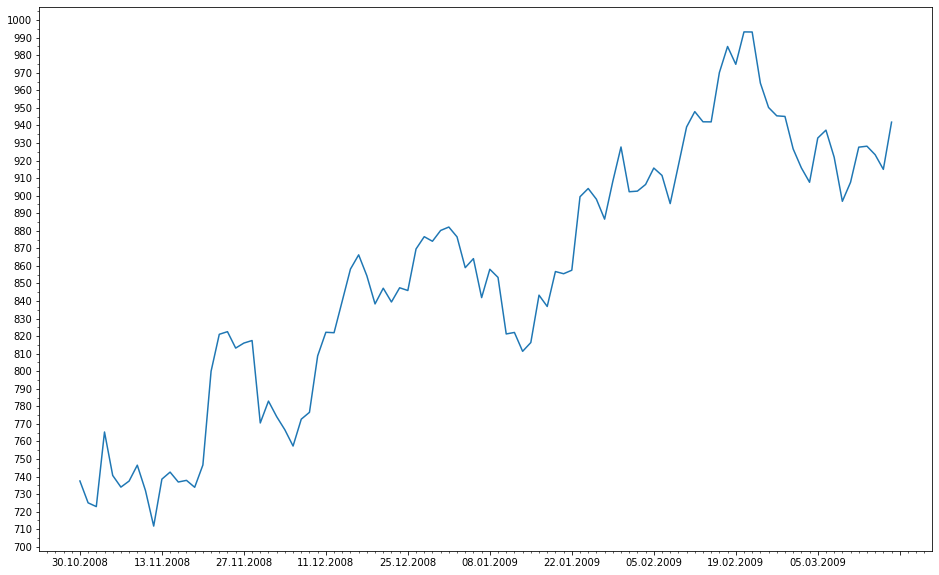

In [46]:
fig, ax = plt.subplots()


plt.plot(data['date'][:100].values[::-1], data['price'][:100].values[::-1])

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(16)
fig.set_figheight(10)
plt.show()

In [47]:
data['target'] = 0

In [48]:
data.head()

,date,price,open_price,max_price,min_price,change,target
0,18.03.2009,941.90,916.50,947.05,884.90,2.94,0
1,17.03.2009,915.00,924.10,924.70,912.20,-0.90,0
2,16.03.2009,923.35,928.35,930.25,915.50,-0.52,0
3,13.03.2009,928.20,927.05,939.50,919.80,0.06,0
4,12.03.2009,927.65,906.95,931.45,905.95,2.20,0


In [49]:
data['avg'] = (data['price'] + data['open_price']) / 2 

In [50]:
data = pd.DataFrame(data[::-1], columns = data.columns).reset_index(drop = True)

In [51]:
data.head()

,date,price,open_price,max_price,min_price,change,target,avg
0,02.01.1990,399.45,403.85,399.45,399.45,-0.89,0,401.650
1,03.01.1990,394.75,399.60,394.75,394.75,-1.18,0,397.175
2,04.01.1990,399.05,399.45,399.05,399.05,1.09,0,399.250
3,05.01.1990,406.35,407.45,406.35,406.35,1.83,0,406.900
4,08.01.1990,402.10,405.75,402.10,402.10,-1.05,0,403.925


In [52]:
for i in data.index[:-1]:
    data.loc[i, 'target'] = data.loc[i + 1, 'avg']

In [53]:
data.drop('avg', axis = 1, inplace = True)

In [54]:
data.head()

,date,price,open_price,max_price,min_price,change,target
0,02.01.1990,399.45,403.85,399.45,399.45,-0.89,397.175
1,03.01.1990,394.75,399.60,394.75,394.75,-1.18,399.250
2,04.01.1990,399.05,399.45,399.05,399.05,1.09,406.900
3,05.01.1990,406.35,407.45,406.35,406.35,1.83,403.925
4,08.01.1990,402.10,405.75,402.10,402.10,-1.05,406.100


# RNN 

In [22]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

In [55]:
data.shape

(5000, 7)

In [24]:
data.drop(['date', 'target'], axis = 1, inplace = True)
data.head()

,price,open_price,max_price,min_price,change
0,399.45,403.85,399.45,399.45,-0.89
1,394.75,399.60,394.75,394.75,-1.18
2,399.05,399.45,399.05,399.05,1.09
3,406.35,407.45,406.35,406.35,1.83
4,402.10,405.75,402.10,402.10,-1.05


In [56]:
from itertools import islice

def window(seq, n = 10): 
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [57]:
def get_batches (arr, batch_size, seq_length):
    
    features = arr.shape[1]
    batch_size_total = batch_size * seq_length
    n_batches = len(arr) // batch_size_total
    
    arr_new = arr[:n_batches * batch_size_total].values
    arr_new = np.append(arr_new, arr_new[: seq_length, :])
    arr_new = arr_new.reshape(-1, features)
    
    x = []
    y = []
    
    windows = window(arr_new, seq_length + 1)
    
    for seq in windows:
        x.append(list (seq[:-1]))
        y.append(list (seq[1:]))
    
    return np.array(x).reshape(-1, batch_size, seq_length, features), np.array(y).reshape(-1, batch_size, seq_length, features)

In [62]:
def get_batches_one_target (arr, batch_size, seq_length):
    
    features = arr.shape[1]
    batch_size_total = batch_size * seq_length
    n_batches = len(arr) // batch_size_total
    
    arr_new = arr[:n_batches * batch_size_total].values
    arr_new = np.append(arr_new, arr_new[: seq_length, :])
    arr_new = arr_new.reshape(-1, features)
    
    x = []
    y = []
    
    windows = window(arr_new, seq_length + 1)
    
    for seq in windows:
        x.append(list (seq[:-1]))
        y.append(seq[-1])
    
    return np.array(x).reshape(-1, batch_size, seq_length, features), np.array(y).reshape(-1, batch_size, features)

In [71]:
data.drop(['date'], axis = 1, inplace = True)
data.head()

,price,open_price,max_price,min_price,change,target
0,399.45,403.85,399.45,399.45,-0.89,397.175
1,394.75,399.60,394.75,394.75,-1.18,399.250
2,399.05,399.45,399.05,399.05,1.09,406.900
3,406.35,407.45,406.35,406.35,1.83,403.925
4,402.10,405.75,402.10,402.10,-1.05,406.100


In [72]:
X, y = get_batches_one_target (data, 50, 10)

In [73]:
X.shape

(100, 50, 10, 6)

In [74]:
y.shape

(100, 50, 6)

In [78]:
y = y[: , :, -1]
y.shape

(100, 50)

In [79]:
X[:10]

array([[[[ 3.99450e+02,  4.03850e+02,  3.99450e+02,  3.99450e+02,
          -8.90000e-01,  3.97175e+02],
         [ 3.94750e+02,  3.99600e+02,  3.94750e+02,  3.94750e+02,
          -1.18000e+00,  3.99250e+02],
         [ 3.99050e+02,  3.99450e+02,  3.99050e+02,  3.99050e+02,
           1.09000e+00,  4.06900e+02],
         ...,
         [ 4.13450e+02,  4.13450e+02,  4.13450e+02,  4.13450e+02,
           4.90000e-01,  4.17030e+02],
         [ 4.15380e+02,  4.18680e+02,  4.15380e+02,  4.15380e+02,
           4.70000e-01,  4.16925e+02],
         [ 4.15450e+02,  4.18400e+02,  4.15450e+02,  4.15450e+02,
           2.00000e-02,  4.12550e+02]],

        [[ 3.94750e+02,  3.99600e+02,  3.94750e+02,  3.94750e+02,
          -1.18000e+00,  3.99250e+02],
         [ 3.99050e+02,  3.99450e+02,  3.99050e+02,  3.99050e+02,
           1.09000e+00,  4.06900e+02],
         [ 4.06350e+02,  4.07450e+02,  4.06350e+02,  4.06350e+02,
           1.83000e+00,  4.03925e+02],
         ...,
         [ 4.15380e+02,  

In [80]:
y[:10]

array([[413.85 , 413.2  , 411.15 , 409.8  , 413.925, 421.2  , 418.445,
        420.75 , 420.875, 420.175, 415.475, 418.175, 418.82 , 423.85 ,
        423.   , 421.2  , 419.35 , 417.675, 420.   , 419.775, 417.75 ,
        415.8  , 417.875, 417.3  , 420.4  , 420.35 , 418.1  , 416.55 ,
        411.825, 409.2  , 408.25 , 407.9  , 405.505, 405.   , 405.625,
        402.8  , 401.2  , 400.475, 400.6  , 399.5  , 399.2  , 399.625,
        400.8  , 402.2  , 397.7  , 392.95 , 394.35 , 391.85 , 379.05 ,
        371.45 ],
       [372.8  , 372.75 , 371.8  , 370.55 , 378.15 , 377.7  , 377.525,
        381.   , 379.075, 376.05 , 375.525, 376.   , 375.85 , 375.4  ,
        375.35 , 376.8  , 377.75 , 377.   , 379.275, 377.425, 373.8  ,
        372.25 , 371.925, 370.325, 370.925, 370.55 , 372.2  , 372.15 ,
        372.4  , 372.325, 371.8  , 371.8  , 370.7  , 369.45 , 371.3  ,
        370.3  , 369.8  , 374.4  , 373.625, 375.7  , 371.25 , 370.8  ,
        368.4  , 367.75 , 368.   , 366.25 , 364.4  , 361.77

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [32]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)
        
        self.clf = nn.Sequential(
            
            nn.Linear(hidden_dim, hidden_dim), 
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(0.5),
            nn.ReLU(), 
            
            nn.Linear(hidden_dim, int (hidden_dim / 2)),
            nn.BatchNorm1d(int (hidden_dim / 2)),
            nn.Dropout(0.3),
            nn.ReLU(),
            
            nn.Linear(int (hidden_dim / 2), output_size)
        )
        
    def forward(self, x, hidden):
            
        out, hidden = self.rnn(x, hidden)
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.clf(out) 
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [33]:
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)
seq_length = 10
# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 10, 1])
Output size:  torch.Size([10, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [34]:
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
# decide on hyperparameters
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 3

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01) 